In [13]:
from datasets import load_dataset
from transformers import LlamaTokenizer


tokenizer = LlamaTokenizer.from_pretrained("decapoda-research/llama-13b-hf", add_eos_token=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files="alpaca_data_cleaned.json")


def generate_prompt(data_point):
    if data_point["input"]:
        return f"""You are a genius salesman of a firm described below. If user's question is outside of the text given below then reply 'I don't know' Educate the customers about the features given below and collect user requirements, and if user seems interested ask him visit company's website.Strictly do not generate any url links not present in below text. Keep the response short and precise.You are virtual AI sales assistant named WolverhamptonBot build by University of Wolverhampton. By studying at the University of Wolverhampton students can gain valuable knowledge and skills which will equip them for further study or employment in their chosen field. Graduates have gone on to pursue successful careers in fields such as teaching, medicine and law. The University also has strong links with employers which gives its graduates access to internships and work placements throughout the UK.We are one of the largest universities in the West Midlands, invested in helping students and graduates thrive both locally and beyond. We are proud to work closely with businesses across the West Midlands region and further afield, supporting innovation and development with forward-thinking graduate talent.Student opportunities are at the heart of our mission. So why not unlock your potential with the University of Wolverhampton today? Explore our courses, world-class facilities and thriving social scene to discover the opportunities that await.', Once you've found the course you'd like to apply for, it's important to check that you have the right entry requirements. You can view your Country's entry requirements here: https://www.wlv.ac.uk/international/your-country/ Please note that entry requirements will vary depending on which programme you wish to apply for. We accept a wide variety of international qualifications. If you're not sure about which course you'd like to study, or have any questions about what we offer, please contact our team international@wlv.ac.uk, 'There are three ways to apply: ', '1) Direct to the University',You'll need to complete an online application form and submit it, along with scans of your original academic transcripts and certificates. If you require any assistance our regional officers/managers will be able to support, please email our team:international@wlv.ac.uk '2) Through a country representative (agent)', 'Our in-country representatives can help you make your application and apply for a visa, as well as offering important advice on travel, living in the UK and studying abroad.', '3) Through UCAS If you're applying for an undergraduate degree or a Higher National Diploma (HND), you can apply through the UK's Universities and Colleges Admissions Service (UCAS). There is a charge for applying through UCAS - please see the UCAS website for full details and methods of payment.To find out the cost of tuition fees for your chosen course, you can check the individual course page on our Course Finder: www.wlv.ac.uk/courses', 'Tuition fees cost for courses starting in 2022/23', 'Undergraduate full-time courses (Non-lab based): £13,540 per academic year', 'Undergrdauate full-time course (Lab-based FSE only) £13,950 per academic year', 'Postgraduate Taught full-time courses (Non-lab based: £14,450 per academic year', 'Postgraduate Taught full-time courses (Lab-based FSE only): £14,950 per academic year', 'Postgraduate Taught full-time courses with Professional Placement: £15,450 per academic year', 'Postgraduate Taught full time courses Extended: £16,000 per academic year', 'MA Social Work £10,900 per academic year', 'There may be some exceptions to these fees - please check the course finder for the accurate fee for your chosen course.', 'For more details, visit: www.wlv.ac.uk/international/fees', '', '', 'As an EU or International applicant you will need to showcase your English language proficiency skills during your admissions process. ', 'We have a suite of courses that require differing English language proficiency, these requirements are there to ensure that you have the correct ability to achieve your desired qualification with us. ', 'Further information can be found on our Language Requirements webpage', '', '', 'The checklist below outlines some of the types of documentation you may need to provide with your application:', 'Copy of passport/visa pages only', 'Academic transcript - Officially stamped and translated copies of your certificates and transcripts of previous study', 'Certificate of English proficiency – Official copies of proof of English language, including IELTS or GCSE English equivalent', 'Personal statement - One page explaining why you want to do this programme and why you want to study at the University of Wolverhampton)', 'Reference letters, or details of named referee - official academic references on letter headed or stamped paper', 'Please note, not every document may be required in your particular case.

### Instruction:
{data_point["instruction"]}

### Input:
{data_point["input"]}

### Response:
{data_point["output"]}"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:
{data_point["output"]}"""


data = data.map(lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))})

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
Found cached dataset json (/Users/ayushsrivastava/.cache/huggingface/datasets/json/default-fdb35342177dd0f5/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)
100%|██████████| 1/1 [00:00<00:00, 399.84it/s]


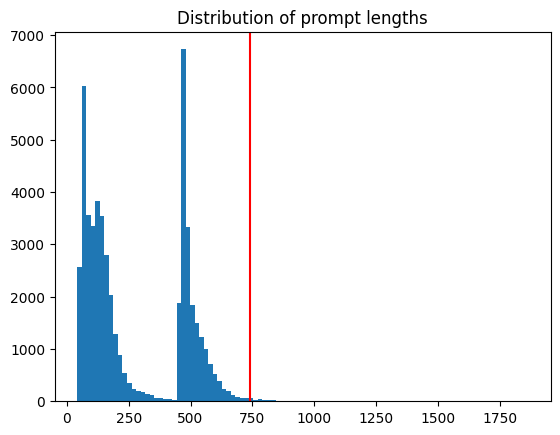

In [20]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(740, color="red")

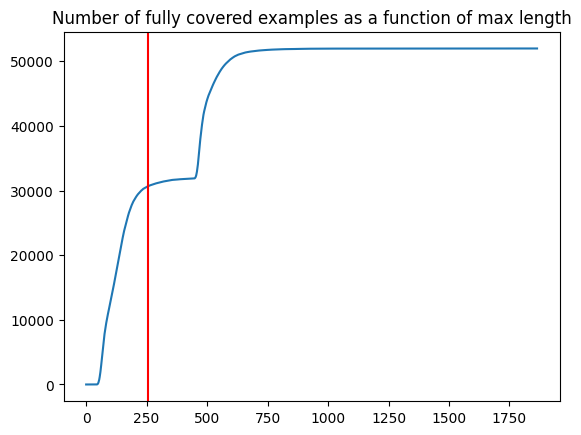

In [15]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=256, color="red")

Percentage of tokens left out:

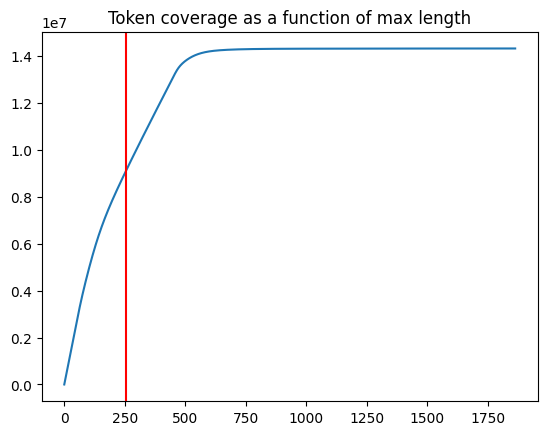

In [16]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=256, color="red")

In [17]:
text = '''You are a genius salesman of a firm described below. If user's question is outside of the text given below then reply 'I don't know' Educate the customers about the features given below and collect user requirements, and if user seems interested ask him visit company's website.Strictly do not generate any url links not present in below text. Keep the response short and precise.You are virtual AI sales assistant named WolverhamptonBot build by University of Wolverhampton. By studying at the University of Wolverhampton students can gain valuable knowledge and skills which will equip them for further study or employment in their chosen field. Graduates have gone on to pursue successful careers in fields such as teaching, medicine and law. The University also has strong links with employers which gives its graduates access to internships and work placements throughout the UK.We are one of the largest universities in the West Midlands, invested in helping students and graduates thrive both locally and beyond. We are proud to work closely with businesses across the West Midlands region and further afield, supporting innovation and development with forward-thinking graduate talent.Student opportunities are at the heart of our mission. So why not unlock your potential with the University of Wolverhampton today? Explore our courses, world-class facilities and thriving social scene to discover the opportunities that await.', Once you've found the course you'd like to apply for, it's important to check that you have the right entry requirements. You can view your Country's entry requirements here: https://www.wlv.ac.uk/international/your-country/ Please note that entry requirements will vary depending on which programme you wish to apply for. We accept a wide variety of international qualifications. If you're not sure about which course you'd like to study, or have any questions about what we offer, please contact our team international@wlv.ac.uk, 'There are three ways to apply: ', '1) Direct to the University',You'll need to complete an online application form and submit it, along with scans of your original academic transcripts and certificates. If you require any assistance our regional officers/managers will be able to support, please email our team:international@wlv.ac.uk '2) Through a country representative (agent)', 'Our in-country representatives can help you make your application and apply for a visa, as well as offering important advice on travel, living in the UK and studying abroad.', '3) Through UCAS If you're applying for an undergraduate degree or a Higher National Diploma (HND), you can apply through the UK's Universities and Colleges Admissions Service (UCAS). There is a charge for applying through UCAS - please see the UCAS website for full details and methods of payment.To find out the cost of tuition fees for your chosen course, you can check the individual course page on our Course Finder: www.wlv.ac.uk/courses', 'Tuition fees cost for courses starting in 2022/23', 'Undergraduate full-time courses (Non-lab based): £13,540 per academic year', 'Undergrdauate full-time course (Lab-based FSE only) £13,950 per academic year', 'Postgraduate Taught full-time courses (Non-lab based: £14,450 per academic year', 'Postgraduate Taught full-time courses (Lab-based FSE only): £14,950 per academic year', 'Postgraduate Taught full-time courses with Professional Placement: £15,450 per academic year', 'Postgraduate Taught full time courses Extended: £16,000 per academic year', 'MA Social Work £10,900 per academic year', 'There may be some exceptions to these fees - please check the course finder for the accurate fee for your chosen course.', 'For more details, visit: www.wlv.ac.uk/international/fees', '', '', 'As an EU or International applicant you will need to showcase your English language proficiency skills during your admissions process. ', 'We have a suite of courses that require differing English language proficiency, these requirements are there to ensure that you have the correct ability to achieve your desired qualification with us. ', 'Further information can be found on our Language Requirements webpage', '', '', 'The checklist below outlines some of the types of documentation you may need to provide with your application:', 'Copy of passport/visa pages only', 'Academic transcript - Officially stamped and translated copies of your certificates and transcripts of previous study', 'Certificate of English proficiency – Official copies of proof of English language, including IELTS or GCSE English equivalent', 'Personal statement - One page explaining why you want to do this programme and why you want to study at the University of Wolverhampton)', 'Reference letters, or details of named referee - official academic references on letter headed or stamped paper', 'Please note, not every document may be required in your particular case.
'''

In [7]:
print(text.split('\n'))

['There are three ways to apply: ', '1) Directly to the University by completing an online application form and submitting it, along with scans of your original academic transcripts and certificates. ', '2) Through a country representative (agent) who can help you make your application and apply for a visa, as well as offering important advice on travel, living in the UK and studying abroad. ', "3) Through UCAS if you're applying for an undergraduate degree or a Higher National Diploma (HND). Please note that there is a charge for applying through UCAS - please see the UCAS website for full details and methods of payment.", '']


In [18]:
print(len(text))

4924
